## <center> <font color='blue'> <b> RNNs for Time Series Prediction </b> </font> </center>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

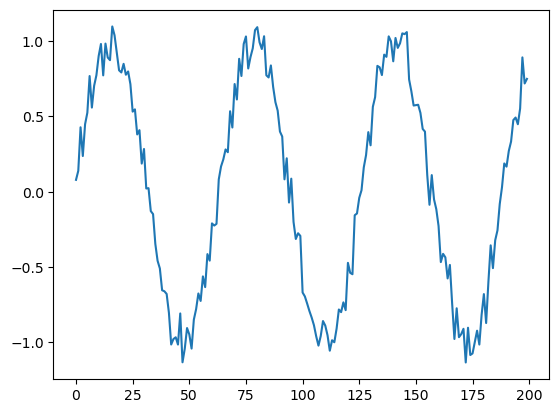

In [4]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show() 


In [7]:
#build the dataset
# use past T values to predict the next one
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t: t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1) # now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (190, 10, 1) Y.shape (190,)


In [18]:
# split into train and test
# because is a forecasting problem we dont split randomly

X_train, y_train = X[:-N//2], Y[:-N//2]
X_val, y_val = X[-N//2:], Y[-N//2:]

In [30]:
# RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5)(i) # default activation is tanh
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)


In [31]:
r = model.fit(
    X_train, y_train,
        epochs = 80,
        verbose = 0,
        validation_data = (X_val, y_val)
)


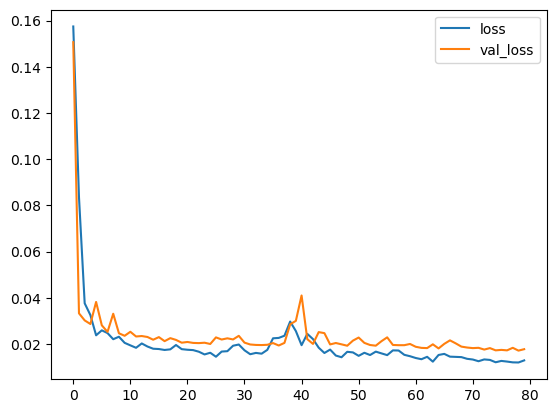

In [32]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [33]:
# forecast future values (use only self-predictions for making future predictions)

val_pred = []

last_x = X_val[0]


while ( len(val_pred) < len(y_val)) :
    p = model.predict(last_x.reshape(1, -1), verbose=0)[0,0]
    val_pred.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

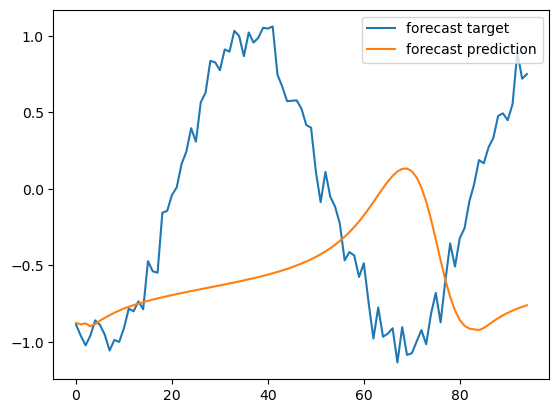

In [34]:
# plot loss per iteration
plt.plot(y_val, label='forecast target')
plt.plot(val_pred, label='forecast prediction')
plt.legend()

We can see that our RNN is not good for this problem.

Lets try again but this time with no activation function.

In [35]:
# RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i) # default activation is tanh
x = Dense(1)(x)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

r = model.fit(
    X_train, y_train,
        epochs = 80,
        verbose = 0,
        validation_data = (X_val, y_val)
)

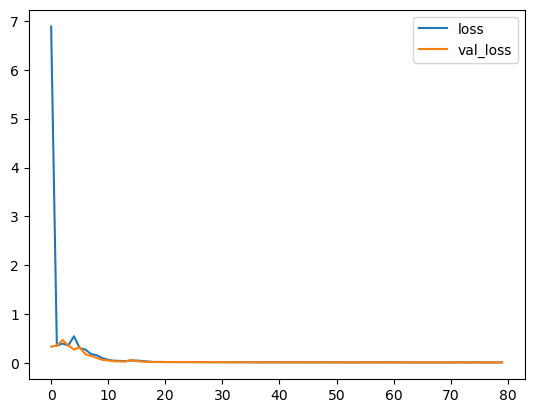

In [36]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [37]:
# forecast future values (use only self-predictions for making future predictions)

val_pred = []

last_x = X_val[0]


while ( len(val_pred) < len(y_val)) :
    p = model.predict(last_x.reshape(1, -1), verbose=0)[0,0]
    val_pred.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

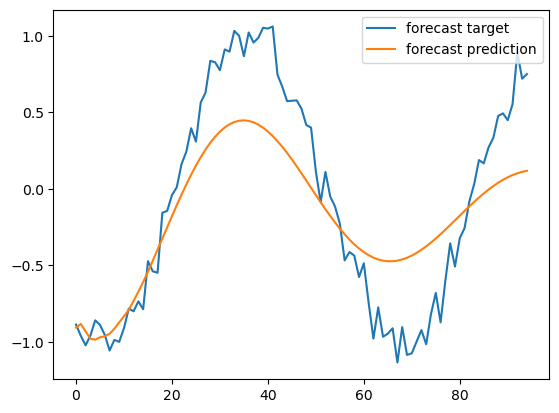

In [38]:
# plot loss per iteration
plt.plot(y_val, label='forecast target')
plt.plot(val_pred, label='forecast prediction')
plt.legend()

These are not good results but are better than using a tanh as activation function for the RNN.